# Downloading python libraries

The first step aims to download almost all necessary libraries used to build a machine learning model while using the programming language python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Dataset

In [2]:
#reading the diamonds dataset the one avalible at kaggle
#link: https://www.kaggle.com/shivam2503/diamonds?fbclid=IwAR1sRjFZXVTJ8FyoKvX-I7r6k4QmvaHB_zCm8rtJHaVHwh2RacRCxdGNlQ8
diamonds= pd.read_csv('Diamonds.csv')

# Data analysis and visualization 

This step helps by giving a general first look at the data in order to better understand the main focus/reason-behind this study

In [3]:
diamonds.info()
#as we can see this attribute help by discovering the number of feature and their data type
#they are three categorical data, six floats, and two integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
diamonds.head()
#by observing the fives first rows we can say that the first input represent the names of the diamonds
# we will have to drop it later

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamonds.describe()
#describe the main info of the data

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
diamonds.isna().sum()
#there is no missing values as a first look

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
(diamonds==0).sum(axis=0)
#observing that the features x, y, and z have zero values. which makes no sense, since they are the dimensions of the diamonds
#so those zeros are in fact missing values

Unnamed: 0     0
carat          0
cut            0
color          0
clarity        0
depth          0
table          0
price          0
x              8
y              7
z             20
dtype: int64

In [8]:
diamonds['color'].value_counts()
#the color feature has seven value types

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
diamonds['cut'].value_counts()
#the cut input has five

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [10]:
diamonds['clarity'].value_counts()
#the clarity feature has eight

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [11]:
diamonds.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


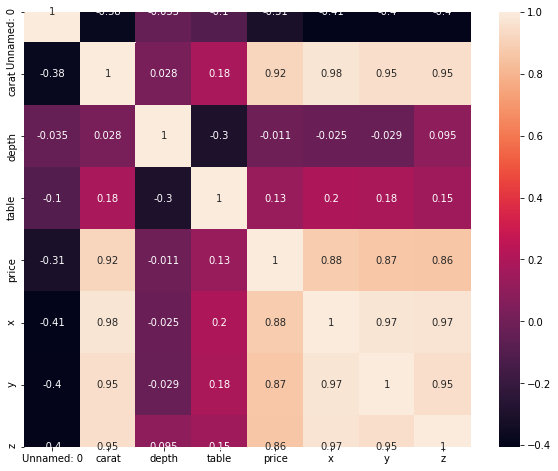

In [12]:
# Create a correlation matrix between every pair of attributes
corr_matrix = diamonds.corr()

# Plot the correlation with seaborn
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [13]:
#From the plot  and table above, we could deduce that:
#x, y, z have strong correlations with price
#carat has the strongest correlation with price (0.92)
#table and depth have the weakest correlations
#carat correlates best with price

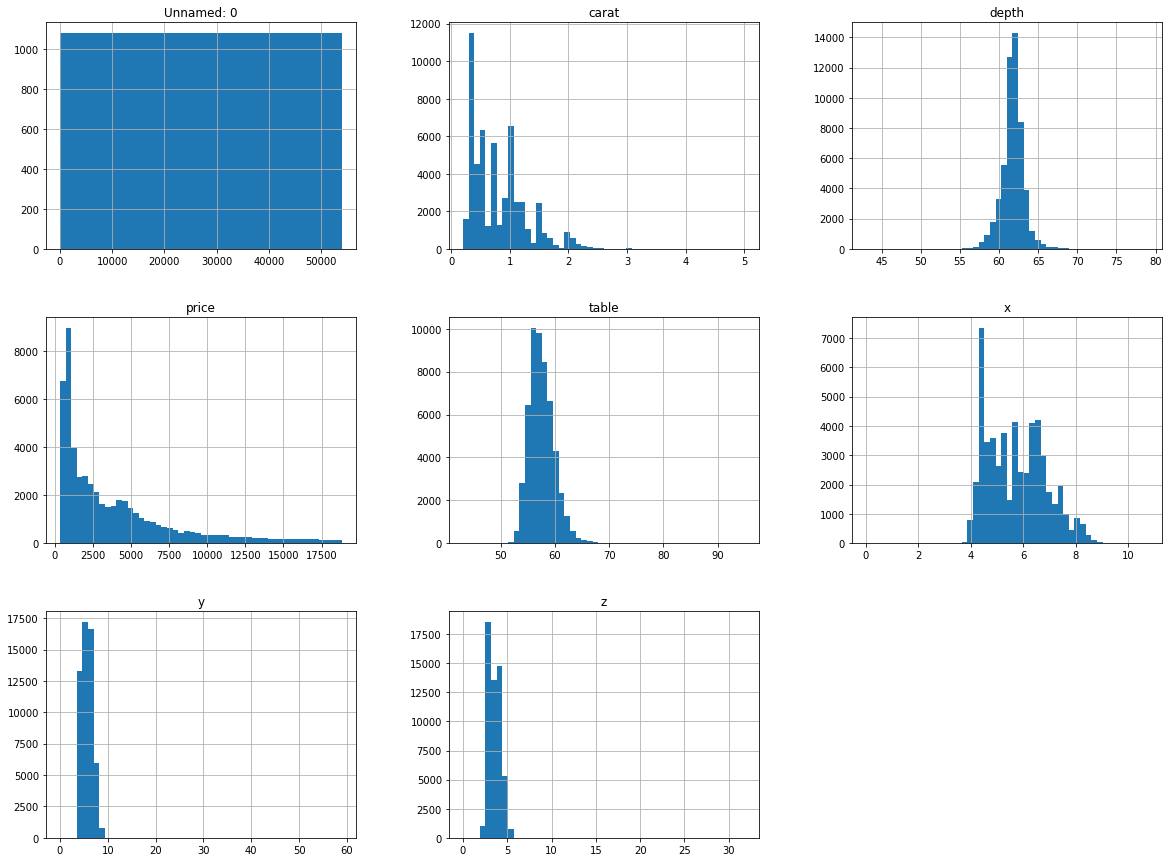

In [14]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

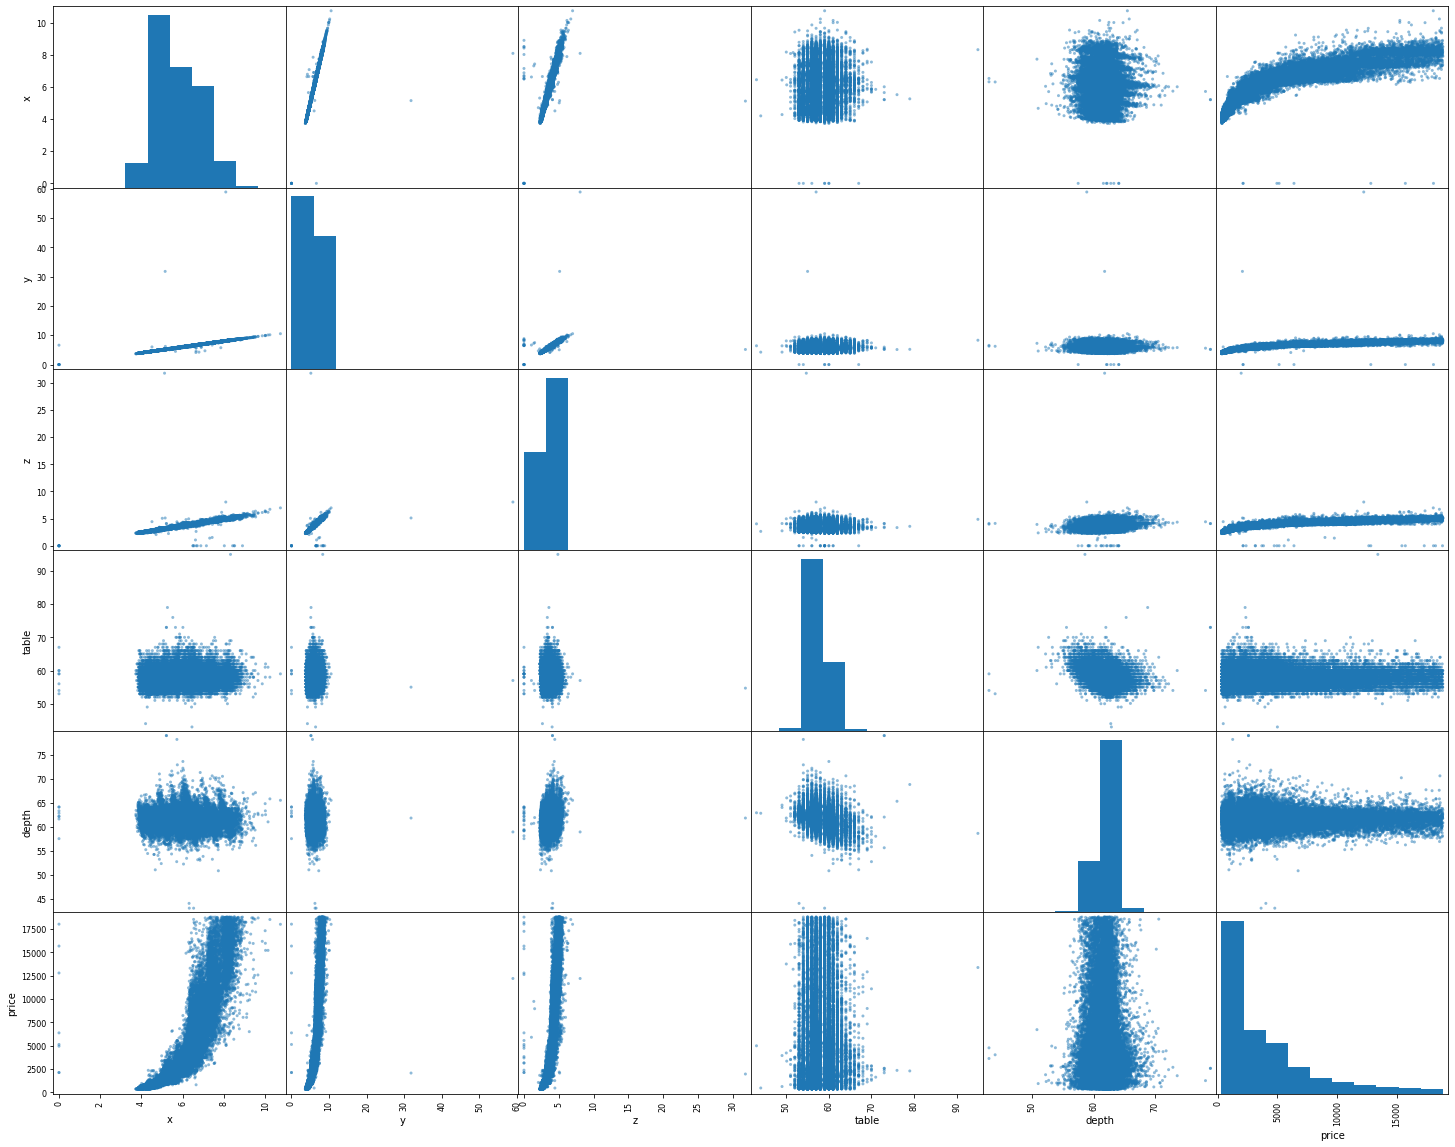

In [15]:
from pandas.plotting import scatter_matrix

attributes = ["x", "y", "z", "table", "depth", "price"]
scatter_matrix(diamonds[attributes], figsize=(25, 20))
plt.show()
#These visualizations have been met our previous obsevation 
#And it's very obvious here that depth and table have very weak correlation with price.

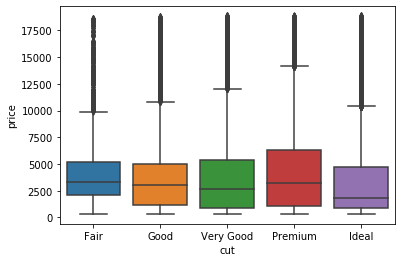

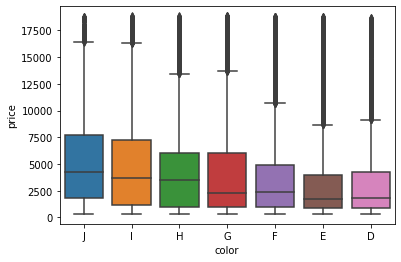

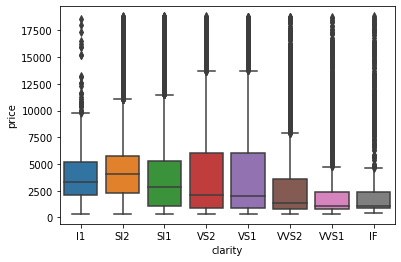

In [16]:
#studing the relationship between the prince and the attributes
sns.boxplot(x='cut', y='price', data=diamonds, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.show()
sns.boxplot(x='color', y='price', data=diamonds, order=['J', 'I', 'H', 'G', 'F', 'E', 'D'])
plt.show()
sns.boxplot(x='clarity', y='price', data=diamonds, order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
plt.show()

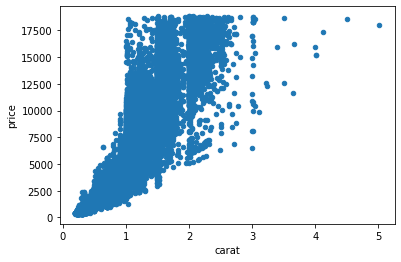

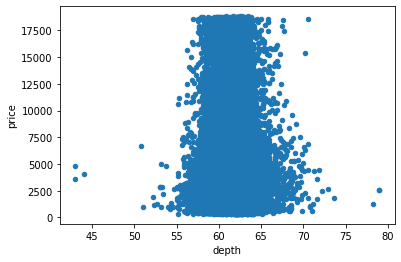

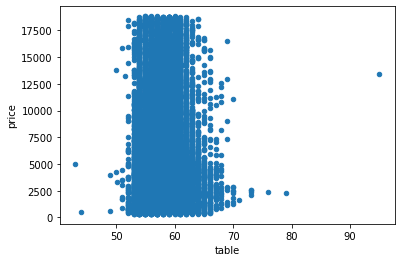

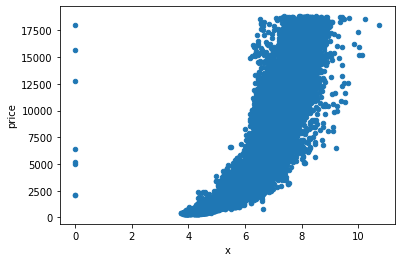

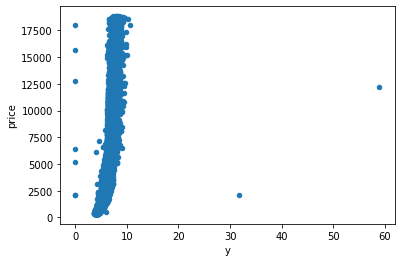

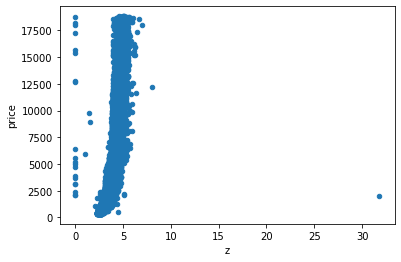

In [17]:
#studing the relationship between the prince and the attributes
diamonds.plot(kind='scatter',y='price', x='carat')
diamonds.plot(kind='scatter',y='price', x='depth')
diamonds.plot(kind='scatter',y='price', x='table')
diamonds.plot(kind='scatter',y='price', x='x')
diamonds.plot(kind='scatter',y='price', x='y')
diamonds.plot(kind='scatter',y='price', x='z')

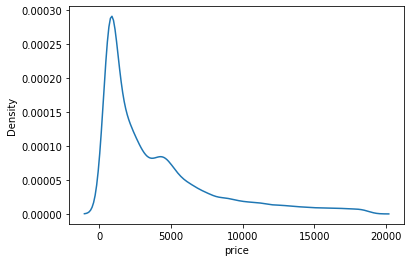

In [18]:
#Destribution of the target 
sns.kdeplot(diamonds['price'])

In [19]:
#adding a new feature
diamonds['price_per_depth'] = diamonds['price']/diamonds['depth']
diamonds.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z,price_per_depth
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208,-0.305700
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.919781
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.035402
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.134154
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.999430
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.884346
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.865514
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.857807
price_per_depth,-0.305700,0.919781,-0.035402,0.134154,0.999430,0.884346,0.865514,0.857807,1.000000


# Data preparing

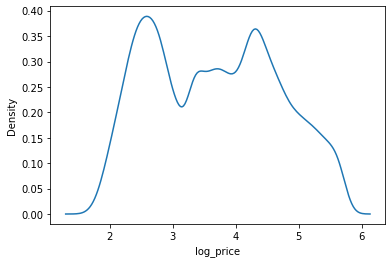

In [20]:
#destribution of the newly added feature
diamonds['log_price'] = np.log(diamonds['price_per_depth'])
sns.kdeplot(diamonds['log_price'])


In [21]:
#down below we had replaced the missing values by the median in x, y, and z.
x_median= diamonds["x"].median()
diamonds["x"].mask(diamonds.x ==0,x_median, inplace=True)
y_median= diamonds["y"].median()
diamonds["y"].mask(diamonds.y ==0,y_median, inplace=True)
z_median= diamonds["z"].median()
diamonds["z"].mask(diamonds.z ==0,z_median, inplace=True)


In [22]:
#removing outliares
print('\n', diamonds[diamonds['y'] > 30], '\n')
print(diamonds[diamonds['z'] > 30], '\n')

diamonds.drop(diamonds[(diamonds['z'] > 30) | (diamonds['y'] > 30) ].index, axis=0, inplace=True)


        Unnamed: 0  carat      cut color clarity  depth  table  price     x  \
24067       24068   2.00  Premium     H     SI2   58.9   57.0  12210  8.09   
49189       49190   0.51    Ideal     E     VS1   61.8   55.0   2075  5.15   

          y     z  price_per_depth  log_price  
24067  58.9  8.06       207.300509   5.334169  
49189  31.8  5.12        33.576052   3.513813   

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
48410       48411   0.51  Very Good     E     VS1   61.8   54.7   1970  5.12   

          y     z  price_per_depth  log_price  
48410  5.15  31.8        31.877023   3.461885   



In [23]:
from sklearn.preprocessing import OneHotEncoder
#split the data into traing set (80%) and test (20%) set.
train_set, test_set = train_test_split(diamonds, test_size=0.2, random_state=42)
#drop the unnecessary columns for the inputs (x)
diamonds= train_set.drop(["Unnamed: 0",'price','price_per_depth','depth','log_price'], axis=1)
#set the target (y) under the name of diamonds labels
diamonds_labels=train_set['log_price'].astype(float)
# data cleaningn by Handling the Categorical and numerical Attributes 
diamonds_num= diamonds.drop(columns =['cut', 'color', 'clarity'], axis=1)
num_attribs = list(diamonds_num)
cat_attribs = ["cut", "color", "clarity"]
#data transformation
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler())])

full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
])



In [24]:
#appling  all the transformations to the diamonds data
diamonds_prepared = full_pipeline.fit_transform(diamonds)

In [25]:
#last but not least take a final look at the data fllowed by start modeling
pd.DataFrame(diamonds_prepared)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.776699,-0.655057,-0.806143,-0.786725,-0.751236,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.445988,0.687764,0.675702,0.786784,0.491373,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.608053,-0.655057,-0.538340,-0.472023,-0.534502,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.608053,1.582978,-0.511559,-0.543955,-0.563400,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.467069,2.030585,0.648921,0.615946,0.592516,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43144,0.530311,0.687764,0.666775,0.696869,0.737005,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43145,-0.481568,1.135371,-0.404438,-0.391100,-0.361115,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43146,-0.966427,-0.655057,-1.118580,-1.092435,-1.083562,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43147,0.214099,0.687764,0.354338,0.265278,0.404679,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Comparison study

In order to select the best-fit candidate that can predict better future data a comparison study is necessary. Down below we select four random chose algorithms where the chose will be taken bass on their RMSE.

## First model LinearRegression

In [26]:
#first model LinearRegression
from sklearn.linear_model import LinearRegression
lin_reg =LinearRegression()
lin_reg.fit(diamonds_prepared, diamonds_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#try it out on a few instances from the training set
some_data = diamonds.iloc[:5]
some_labels = diamonds_labels.iloc[:5]

some_data_prepared=full_pipeline.transform(some_data)
print("Predictions", lin_reg.predict(some_data_prepared))
print('Labels', list(some_labels))


Predictions [2.62745366 4.55832231 3.56083472 3.14990188 4.34399422]
Labels [2.441718741167238, 4.660534574108404, 3.954188306117676, 3.131507878076255, 4.189209737198197]


In [28]:
#calculat it's rmse
from sklearn.metrics import mean_squared_error
diamonds_predictions= lin_reg.predict(diamonds_prepared)
lin_mse=mean_squared_error(diamonds_labels, diamonds_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

0.13781738398346574

## Second Model DecisionTreeRegressor 

In [29]:
# Second Model DecisionTreeRegressor 
#calculate it's rmse
from sklearn.tree import DecisionTreeRegressor 
tree_reg= DecisionTreeRegressor()
tree_reg.fit(diamonds_prepared, diamonds_labels)
diamonds_predictions= tree_reg.predict(diamonds_prepared)
tree_mse=mean_squared_error(diamonds_labels,diamonds_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.004867236388700699

## Third model RandomForestRegressor

In [30]:
# Third model RandomForestRegressor
#calculate it's rmse
from sklearn.ensemble import RandomForestRegressor
forest_reg= RandomForestRegressor()
forest_reg.fit(diamonds_prepared, diamonds_labels)
diamonds_predictions= forest_reg.predict(diamonds_prepared)
forest_mse=mean_squared_error(diamonds_labels,diamonds_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

C:\Users\EULDJI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.041401419280223825

## Last model Support Vector Machine regressor

In [31]:
# Last model Support Vector Machine regressor
#calculate it's rmse
from sklearn.svm import SVR
svm_reg=SVR(kernel="linear")
svm_reg.fit(diamonds_prepared, diamonds_labels)
diamonds_predictions=svm_reg.predict(diamonds_prepared)
svm_mse=mean_squared_error(diamonds_labels,diamonds_predictions)
svm_rmse=np.sqrt(svm_mse)
svm_rmse

0.13802985107689245

# Evaluation Using Cross-Validation

In order to have a better view on the used algorithms, the cross-validation were applied

In [32]:
#creat the display scores function
def display_scores(scores):
    print( 'scores: ', scores)
    print('Mean: ', scores.mean())
    print('Stander deviation: ', scores.std())

In [33]:
# Evaluation Using Cross-Validation for the LinearRegression model
from sklearn.model_selection import cross_val_score
lin_scores= cross_val_score(lin_reg, diamonds_prepared, diamonds_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_score=np.sqrt(-lin_scores)
display_scores(lin_rmse_score)

scores:  [0.13819819 0.13593297 0.14013028 0.14932653 0.1331767  0.13297915
 0.13551289 0.13685493 0.138149   0.13975035]
Mean:  0.138001098672665
Stander deviation:  0.004429404136504995


In [34]:
# Evaluation Using Cross-Validation for the DecisionTreeRegressor model
tree_scores= cross_val_score(tree_reg, diamonds_prepared, diamonds_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_score=np.sqrt(-tree_scores)
display_scores(tree_rmse_score)

scores:  [0.13006617 0.12815362 0.13023627 0.13856157 0.12523288 0.12143708
 0.12668763 0.12696704 0.12566806 0.13019271]
Mean:  0.12832030348594023
Stander deviation:  0.00428460604754718


In [35]:
# Evaluation Using Cross-Validation for the RandomForestRegressor model
forest_scores= cross_val_score(forest_reg, diamonds_prepared, diamonds_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_score=np.sqrt(-forest_scores)
display_scores(forest_rmse_score)

scores:  [0.1002869  0.09654052 0.09707527 0.10624537 0.09704126 0.09320097
 0.09602732 0.09898057 0.09356145 0.09835269]
Mean:  0.09773123418608849
Stander deviation:  0.00352288046985322


In [36]:
# Evaluation Using Cross-Validation for the Support Vector Machine regressor model
svm_scores= cross_val_score(svm_reg, diamonds_prepared, diamonds_labels, scoring='neg_mean_squared_error', cv=10)
svm_rmse_score=np.sqrt(-svm_scores)
display_scores(svm_rmse_score)

scores:  [0.13771237 0.1356117  0.14088219 0.14960231 0.13310346 0.13303897
 0.13576564 0.13613448 0.13907307 0.13986863]
Mean:  0.13807928088469015
Stander deviation:  0.004586374561306809


# Saving the model

In [37]:
#save model 
import joblib
joblib.dump(svm_reg, "svm_reg.pkl")
joblib.dump(lin_reg, "lin_reg.pkl")
joblib.dump(tree_reg, "tree_reg.pkl")
joblib.dump(forest_reg, "forest_reg.pkl")

['forest_reg.pkl']

# Uploading the model

In [38]:
# for uploading
svm_reg = joblib.load("svm_reg.pkl")
lin_reg = joblib.load("lin_reg.pkl")
tree_reg = joblib.load("tree_reg.pkl")
forest_reg = joblib.load("forest_reg.pkl")

# Fine-Tune Your Model

Looking at the RMSE of the models it's clearly opinion that the Random Forest Regression is the best fit-candidate. 

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(diamonds_prepared, diamonds_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [40]:
#RMSE for the best score
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

0.09622910328128986

In [41]:
#best combination
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [42]:
# another method for the best hyperparameter values
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [43]:
# evaluation scores
cvres= grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)    

0.14046236746331386 {'max_features': 2, 'n_estimators': 3}
0.1161755113863727 {'max_features': 2, 'n_estimators': 10}
0.10843839663768892 {'max_features': 2, 'n_estimators': 30}
0.12571457853053764 {'max_features': 4, 'n_estimators': 3}
0.10892328811566511 {'max_features': 4, 'n_estimators': 10}
0.10255196133151018 {'max_features': 4, 'n_estimators': 30}
0.11885473393400314 {'max_features': 6, 'n_estimators': 3}
0.10348674149970716 {'max_features': 6, 'n_estimators': 10}
0.09802160264783172 {'max_features': 6, 'n_estimators': 30}
0.11637148590599072 {'max_features': 8, 'n_estimators': 3}
0.10150560925824496 {'max_features': 8, 'n_estimators': 10}
0.09622910328128986 {'max_features': 8, 'n_estimators': 30}
0.1304500182462749 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.11302704428528569 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.1270888530877802 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.10979911891097419 {'bootstrap': False, 'max_fea

# Evaluate Your System on the Test Set

now, we had select a model, and determine the best combination of hyperparameter values so far. It's time to evaluate its performance on a test set

In [44]:
final_model = grid_search.best_estimator_
X_test = test_set.drop(["Unnamed: 0",'price','log_price'], axis=1)
y_test = test_set["log_price"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


0.09413581318533729

In [45]:
final_mse = mean_squared_error(np.exp(y_test),np.exp( final_predictions))
final_rmse = np.sqrt(final_mse)
final_rmse

8.898695631481246

compute a 95% confidence interval for the generalization error

In [46]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([0.09128032, 0.0969072 ])

In [47]:
#final we had to save the final selected model. that will be use for predicting future data.
import joblib
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']